# Introduce the selection of two segmentation ways：
- ### Based on time gaps only. 
- ### Based on both time and flux gaps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 250
import pandas as pd 

## Take a partial Kepler long-cadence light curve of KIC 2299081 as an example

In [2]:
data = pd.read_csv(f'./example_data/segment_example.csv')
t = np.array(data['t'])
f = np.array(data['f'])
df = np.array(data['df'])

There is a flux gap that mimics a deep transit near 194.447 day. Outliers can also produce false positives, so here an outlier is added in this case.

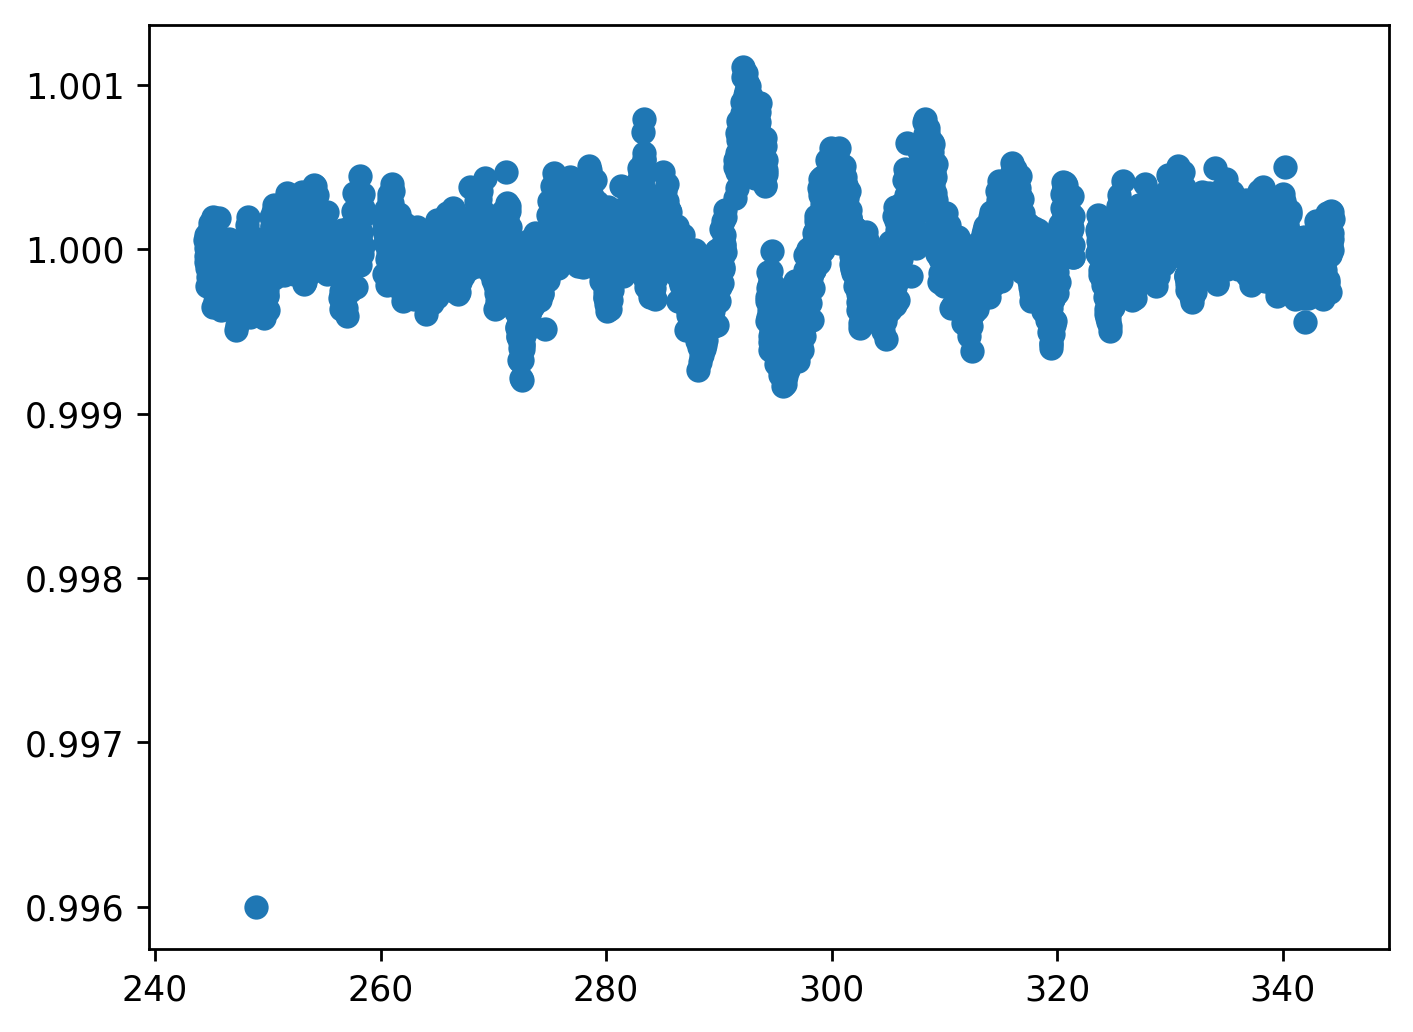

In [3]:
tm = 294.447
idx = np.where((t>tm-50)&(t<tm+50))[0]
t_plot = t[idx]
f_plot = f[idx]
df_plot = df[idx]
f_plot[200]=0.996  # An outlier is added.
plt.scatter(t_plot,f_plot)

In [4]:
from SPLS import SPLeastSquares
SPsearch = SPLeastSquares(t_plot,f_plot,df_plot)

## Segment the time series data based on time gaps only. 

In [5]:
SPsearch.step0_segment(flux_gap=False)

The light curve is divided into 16 segments according to time gaps.


## Segment the time series data based on time and flux gaps. 

The light curve is divided into 16 segments according to time gaps.


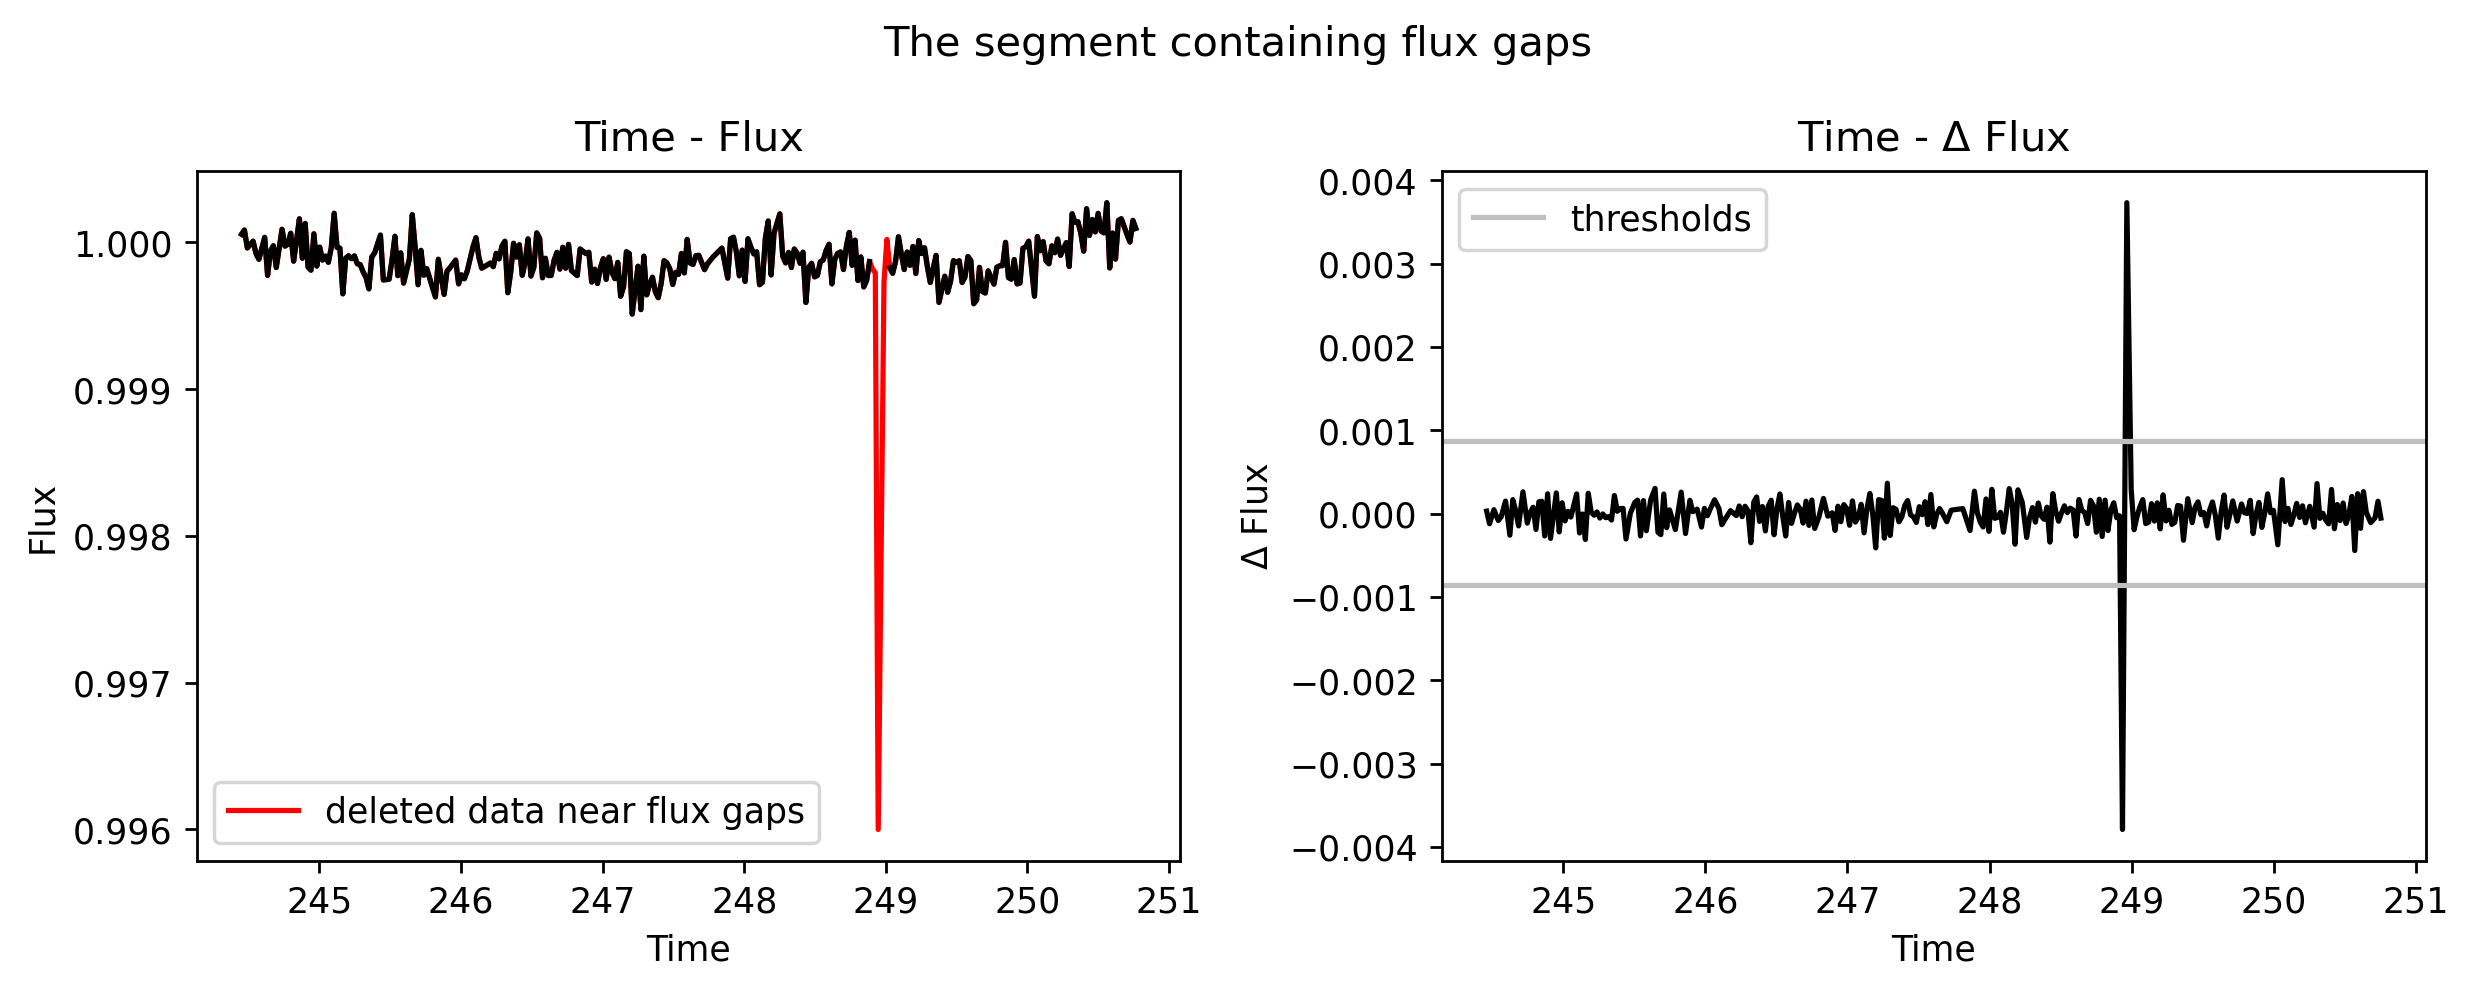

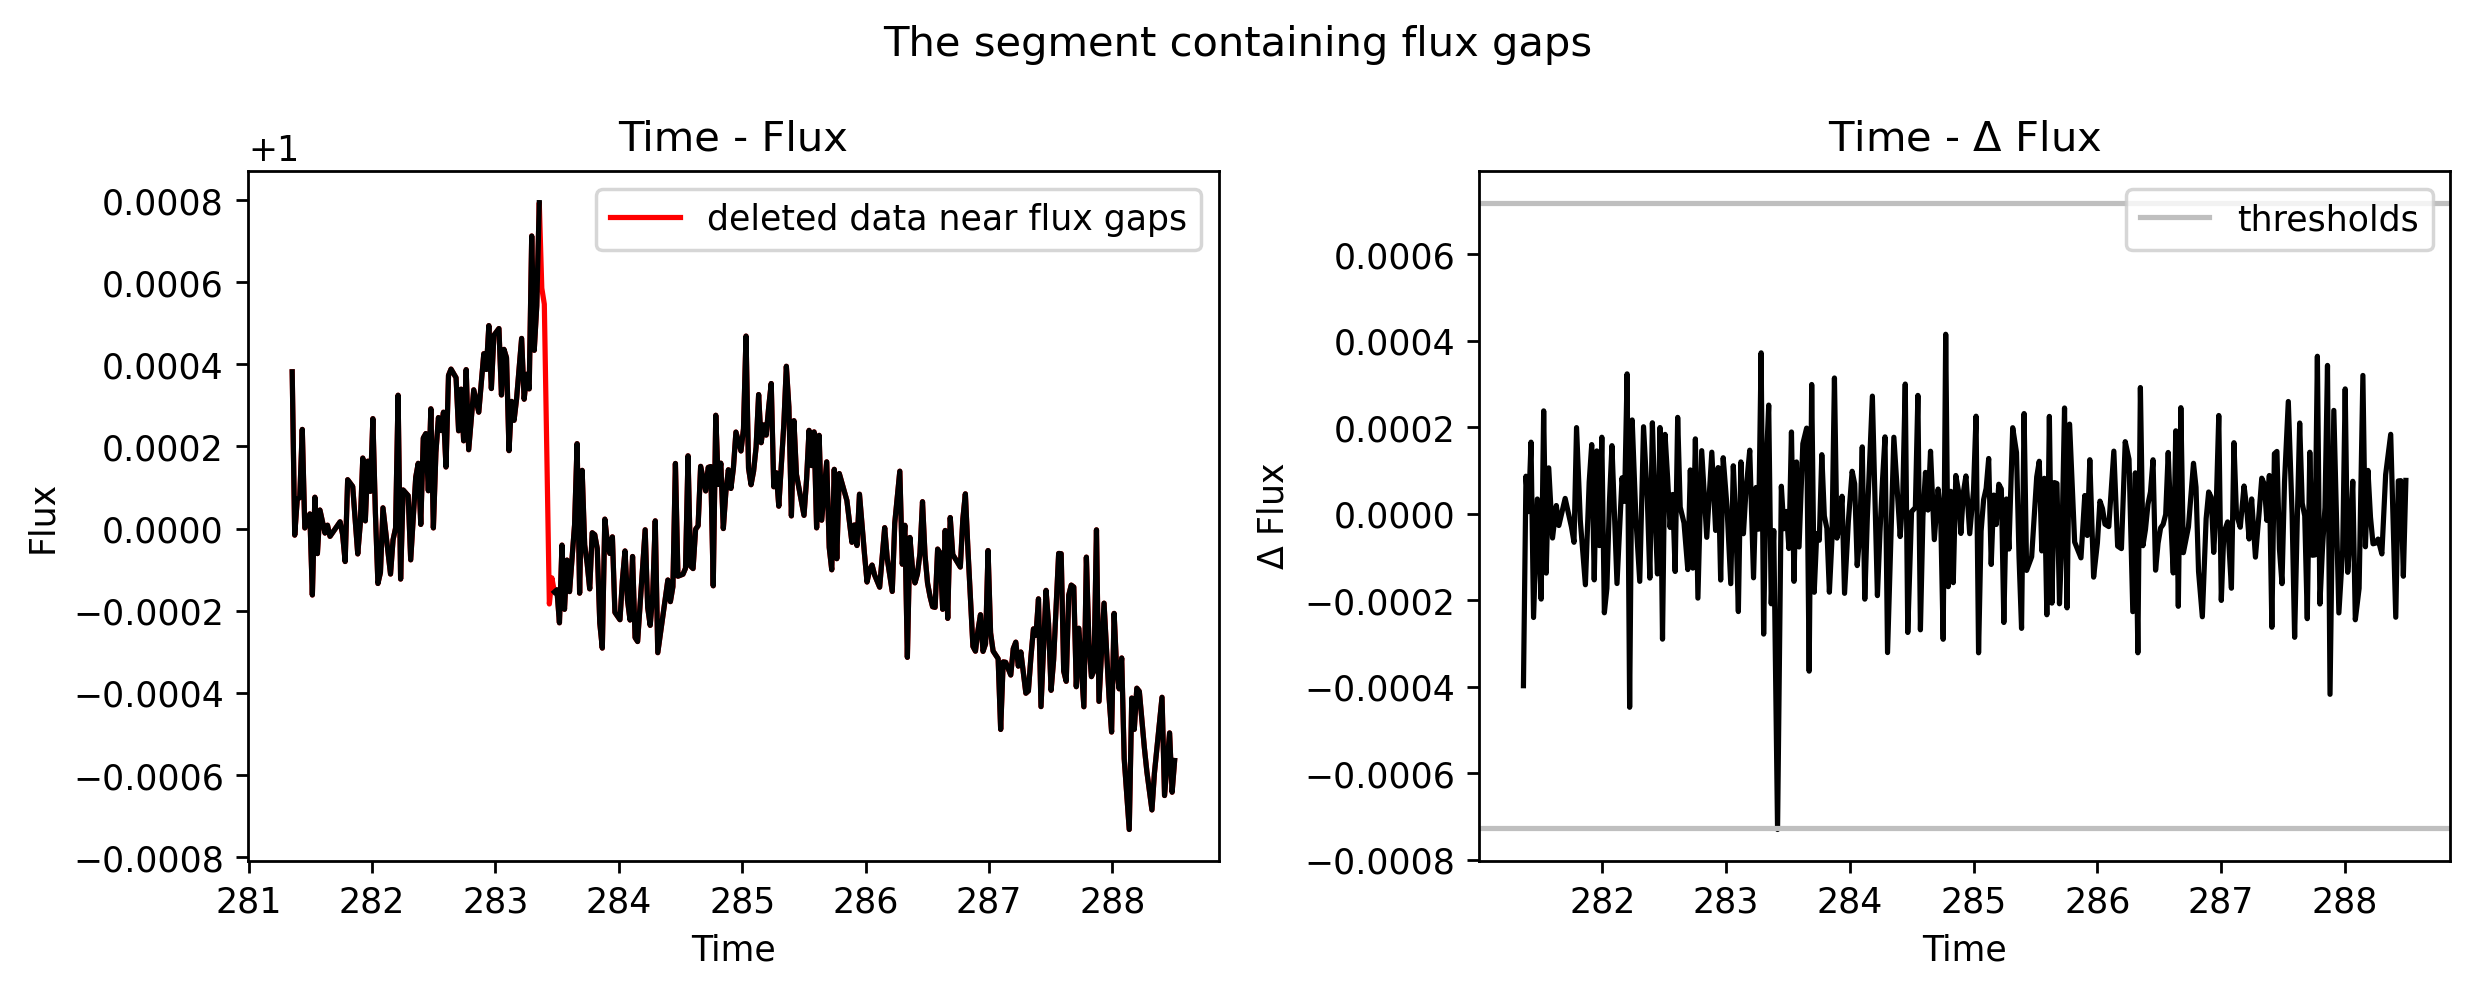

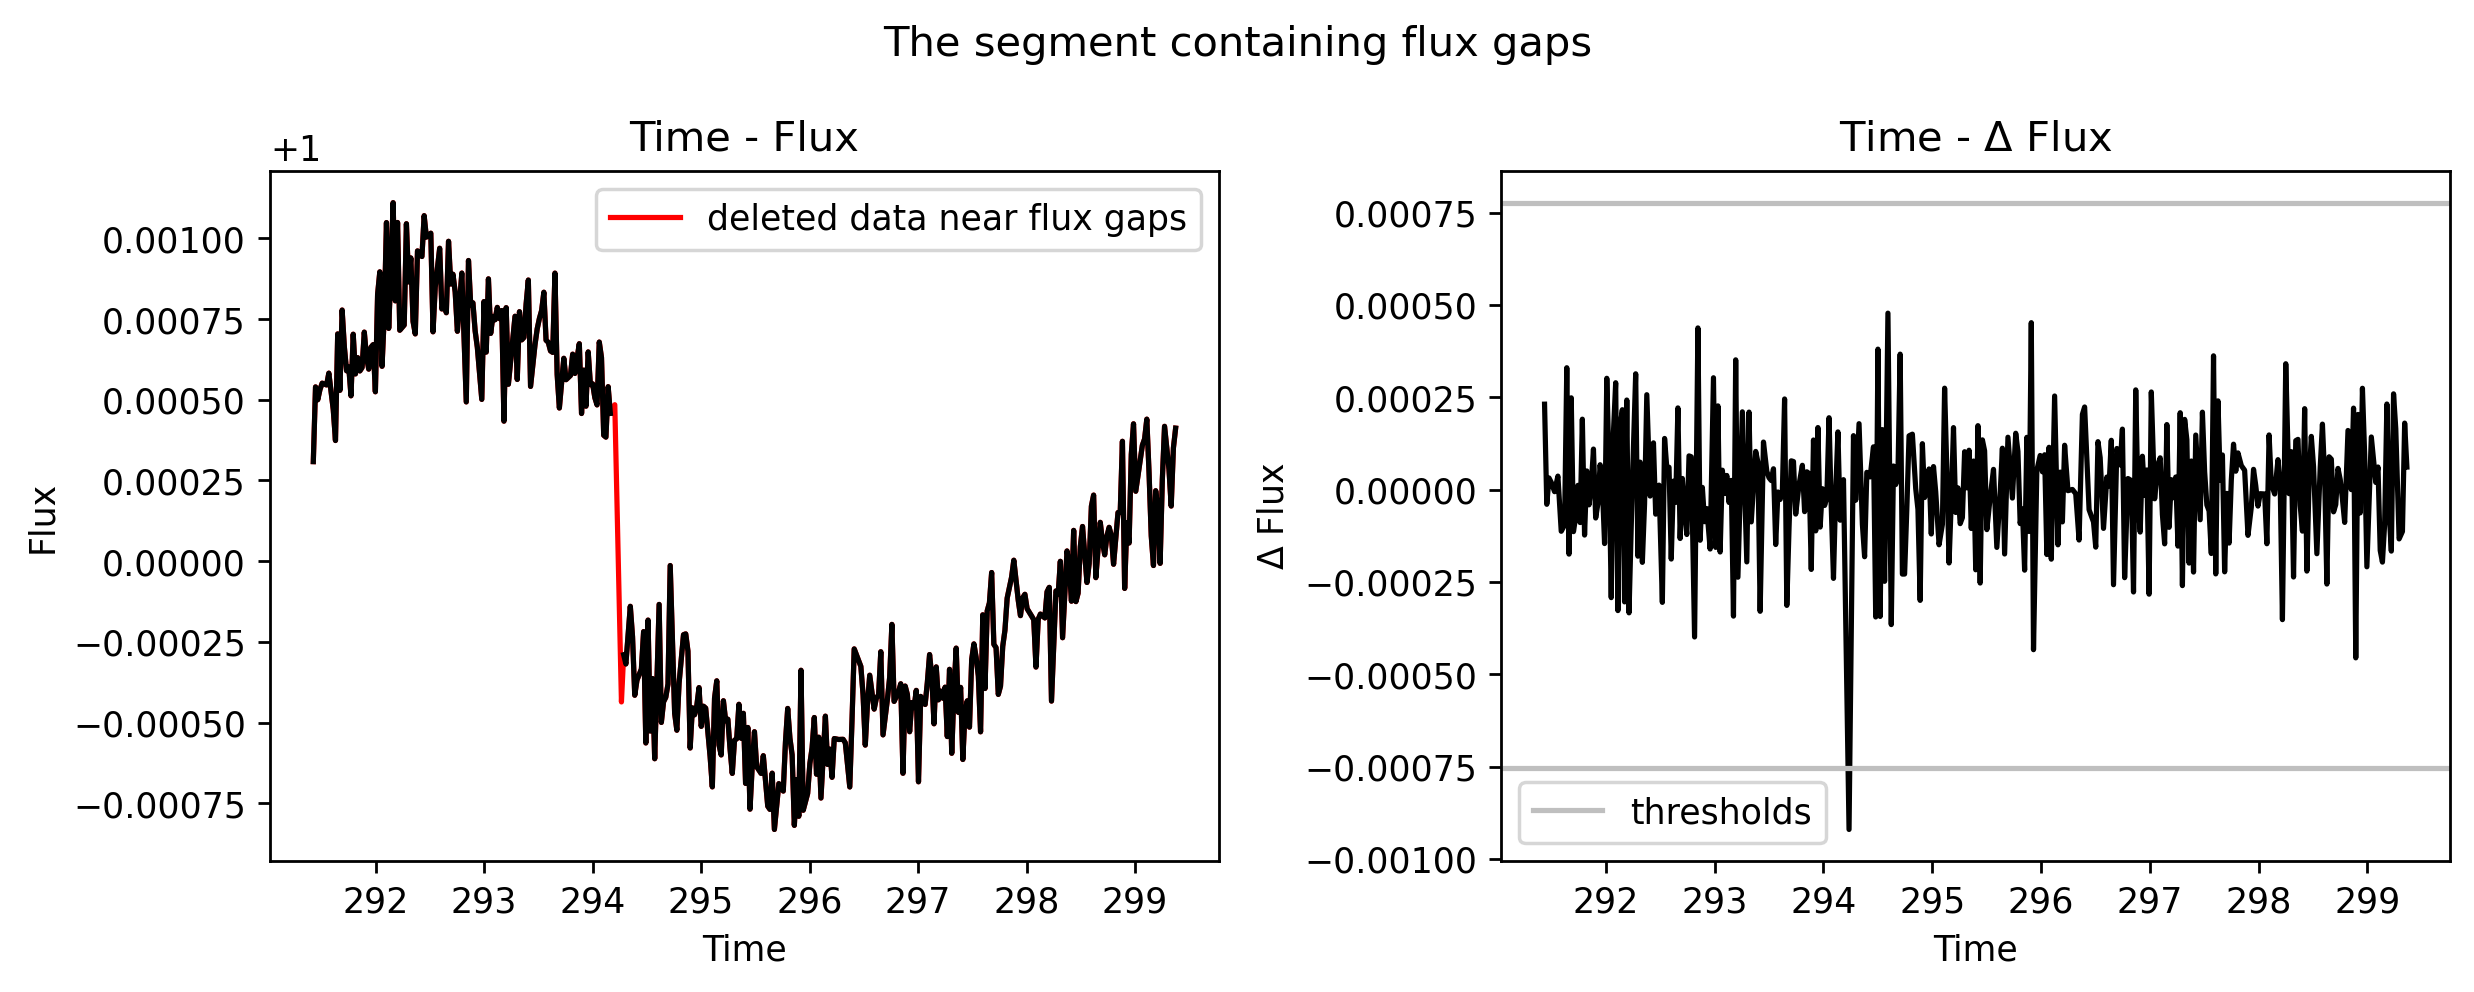

The light curve is further divided into 19 segments according to flux gaps.


In [6]:
SPsearch.step0_segment(flux_gap=True)

#### - If you want to detect signals with a high signal-to-noise ratio, it is recommended to segment the data based on time gaps only.
#### - If your goal is to detect signals with a low signal-to-noise ratio, it is recommended to segment based on both time and flux gaps to reduce false positives caused by flux gaps.